In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative, print_comparison_table
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time


n_epochs = 10
n_points = 10
dh = 1e-3

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 4.299916326999664e-06
Valid max absolute error |Appr(x)-y(x)|: 4.080124199390411e-06
MAPE on train data: 0.000627109024208039 %
MAPE on validation data: 0.0006136264419183135 %
Max residual square loss on train at last epoch: 8.946293661438176e-08 


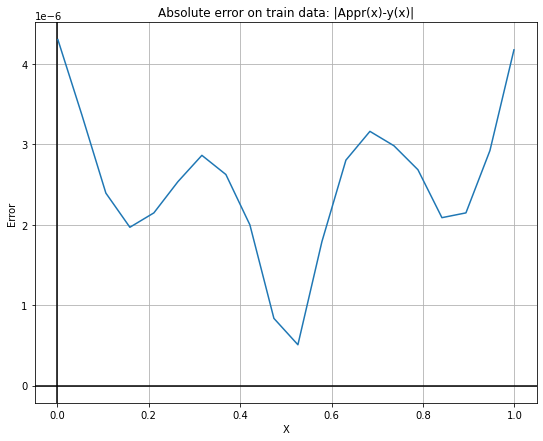

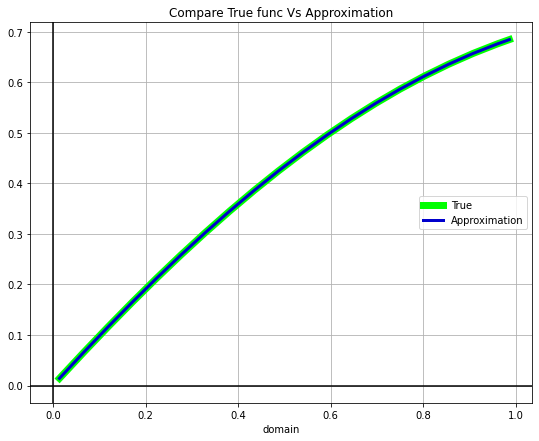

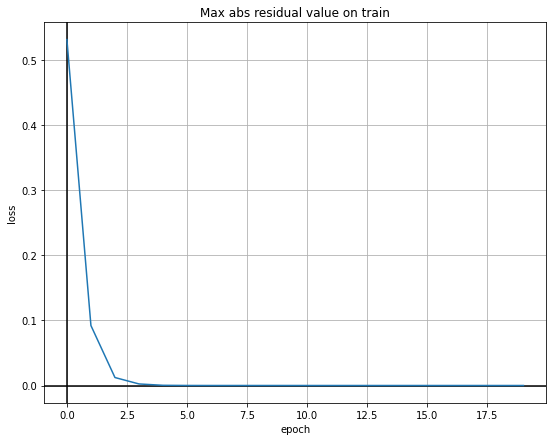

In [4]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [5]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(0 + dh, 0.1, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.004677928984165192
Valid max absolute error |Appr(x)-y(x)|: 0.004618056118488312
MAPE on train data: 4.7804059982299805 %
MAPE on validation data: 4.779959678649902 %
Max residual square loss on train at last epoch: 7.725967066107842e-07 


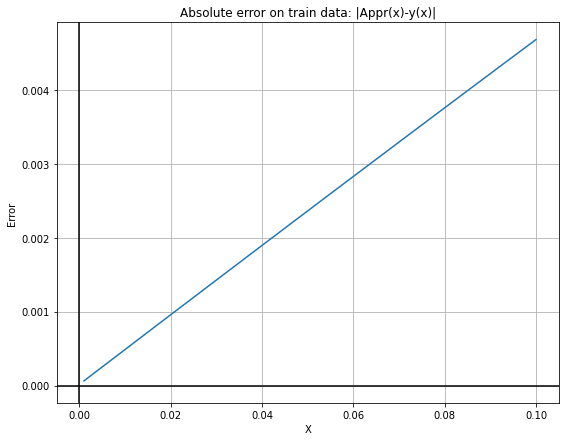

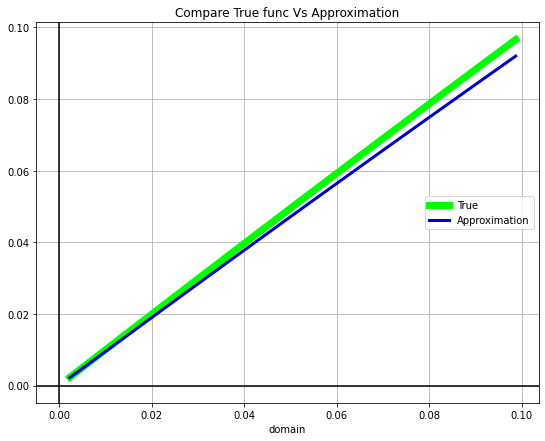

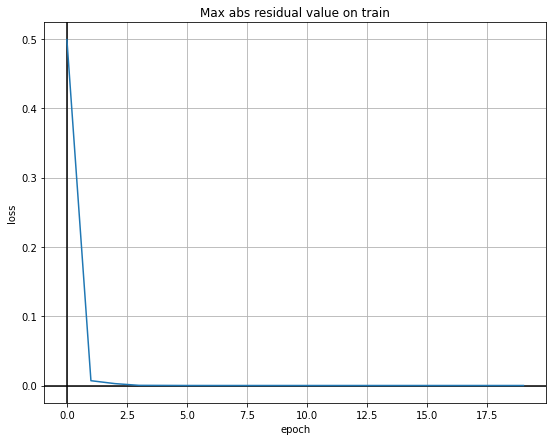

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 2.1517276763916016e-05
Valid max absolute error |Appr(x)-y(x)|: 2.1457672119140625e-05
MAPE on train data: 0.0022278157994151115 %
MAPE on validation data: 0.0022264462895691395 %
Max residual square loss on train at last epoch: 6.71103705940368e-08 


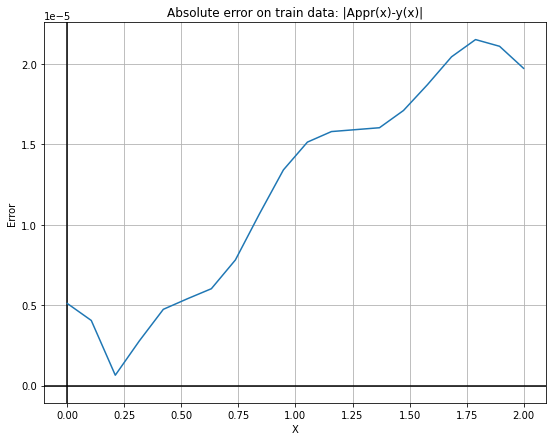

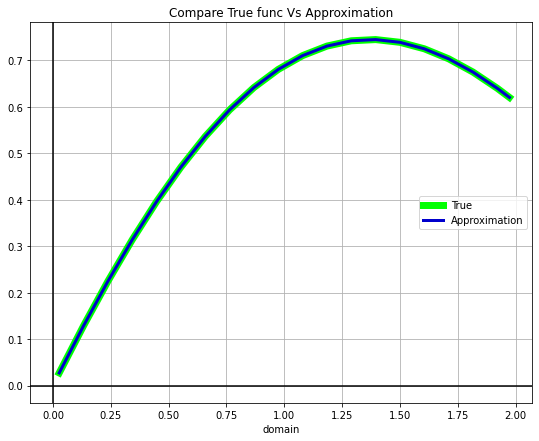

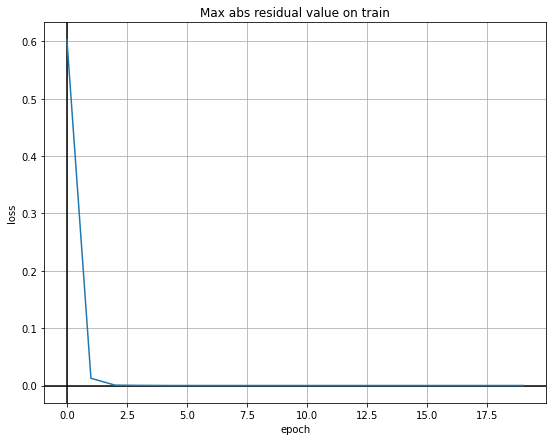

In [8]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [9]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

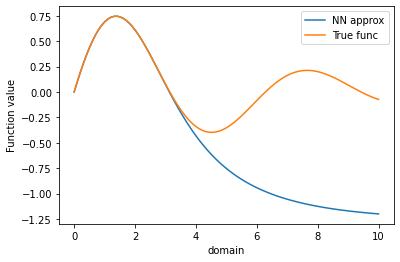

In [10]:
plt.plot(data, nn_model(data).detach().numpy(), label='NN approx')
plt.plot(data, true_solution(data).detach().numpy(), label='True func')
plt.xlabel("domain")
plt.ylabel("Function value")
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [11]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0011424841359257698
Valid max absolute error |Appr(x)-y(x)|: 0.0011431816965341568
MAPE on train data: 0.23899278044700623 %
MAPE on validation data: 0.2392529547214508 %
Max residual square loss on train at last epoch: 1.2808947758458089e-05 


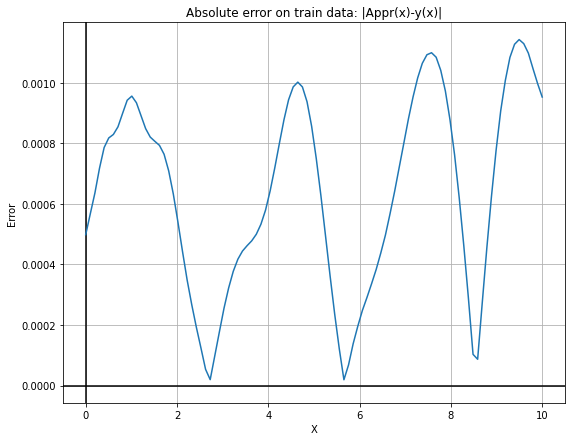

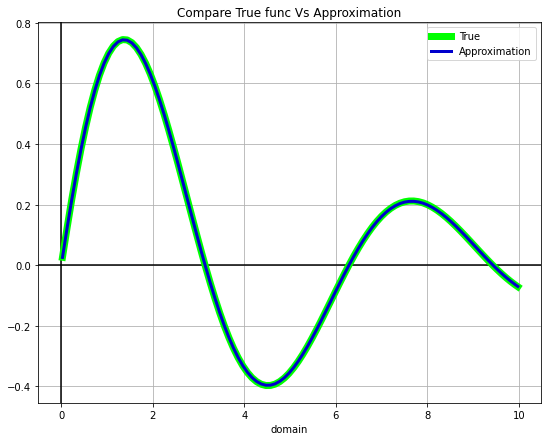

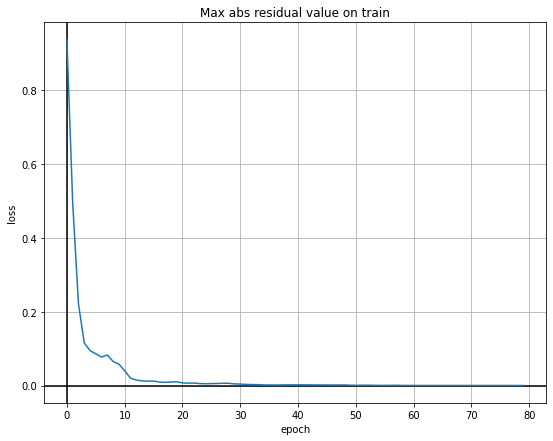

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [13]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 40
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.11925805360078812
Valid max absolute error |Appr(x)-y(x)|: 0.11762657761573792
MAPE on train data: 23.538061141967773 %
MAPE on validation data: 23.623769760131836 %
Max residual square loss on train at last epoch: 0.009691687300801277 


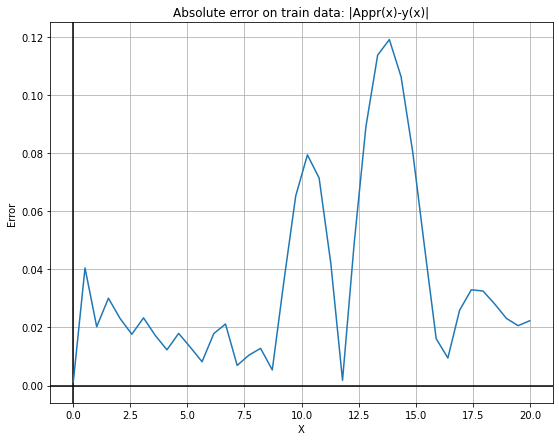

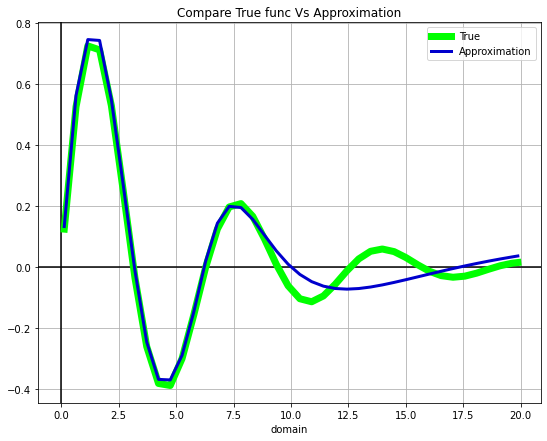

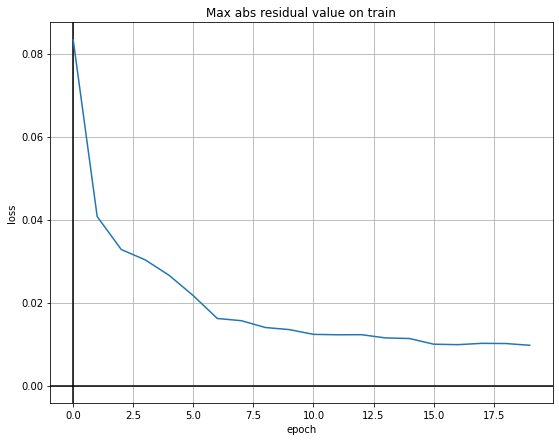

In [14]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

Apparently if | residual |=| left_part_eq - right_part_eq | ~ 0 doesnt mean 
that algorithm converged to a true solution

In [15]:
main_eq.get_residuals(nn_model, "train")

tensor([[ 0.0020],
        [ 0.0018],
        [-0.0058],
        [ 0.0203],
        [-0.0226],
        [ 0.0123],
        [ 0.0071],
        [-0.0162],
        [ 0.0076],
        [ 0.0098],
        [-0.0172],
        [ 0.0088],
        [ 0.0248],
        [-0.0080],
        [-0.0364],
        [-0.0256],
        [ 0.0136],
        [ 0.0530],
        [ 0.0706],
        [ 0.0588],
        [ 0.0230],
        [-0.0236],
        [-0.0662],
        [-0.0931],
        [-0.0984],
        [-0.0829],
        [-0.0524],
        [-0.0156],
        [ 0.0186],
        [ 0.0434],
        [ 0.0552],
        [ 0.0542],
        [ 0.0435],
        [ 0.0278],
        [ 0.0121],
        [ 0.0006],
        [-0.0047],
        [-0.0034],
        [ 0.0030],
        [ 0.0123]], grad_fn=<SubBackward0>)

despite MSE's convergence to zero we see that function did not converge

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [16]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.003732144832611084
Valid max absolute error |Appr(x)-y(x)|: 0.003689110279083252
MAPE on train data: 0.3719955086708069 %
MAPE on validation data: 0.3713580369949341 %
Max residual square loss on train at last epoch: 8.107088797260076e-05 


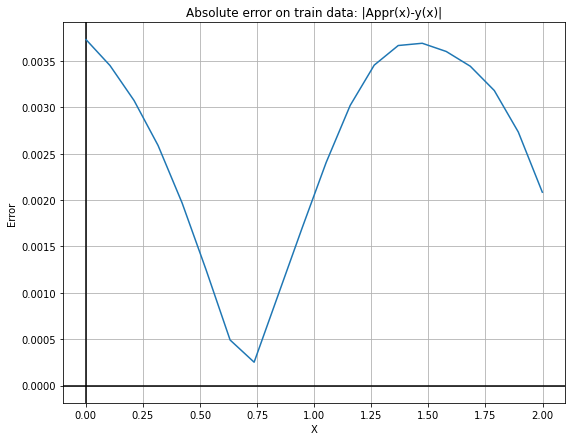

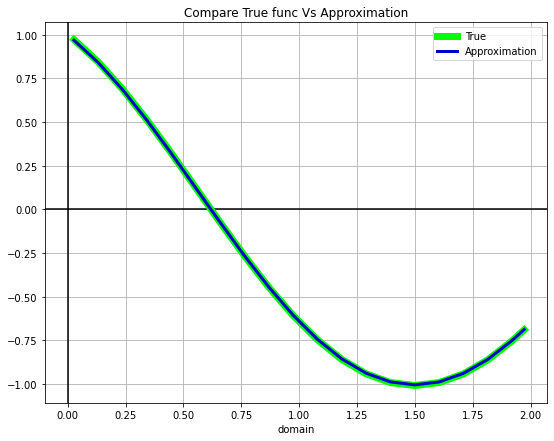

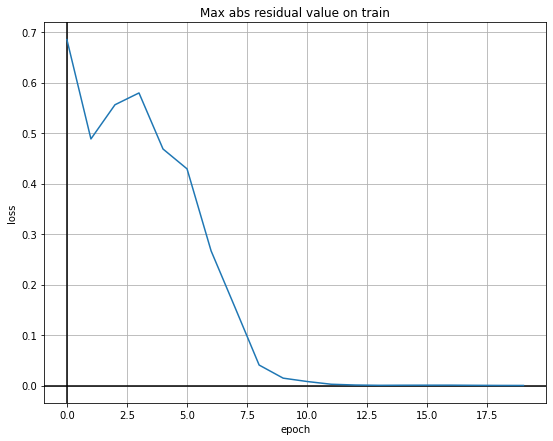

In [17]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence

In [18]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 50
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.20995306968688965
Valid max absolute error |Appr(x)-y(x)|: 0.2107858657836914
MAPE on train data: 19.781465530395508 %
MAPE on validation data: 19.757972717285156 %
Max residual square loss on train at last epoch: 0.030932269990444183 


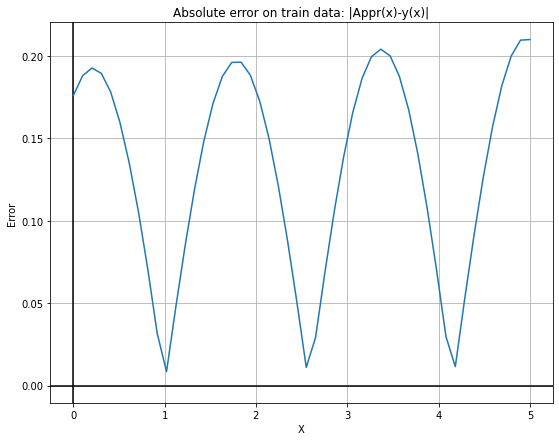

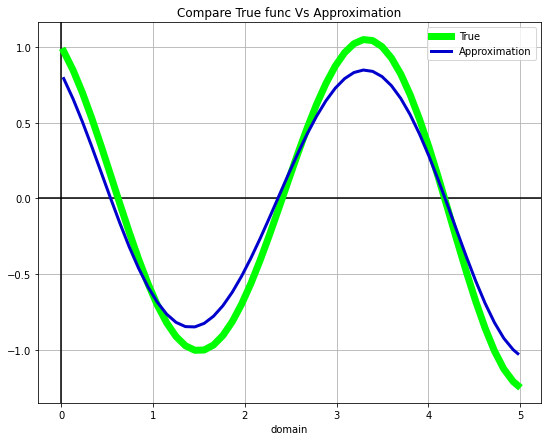

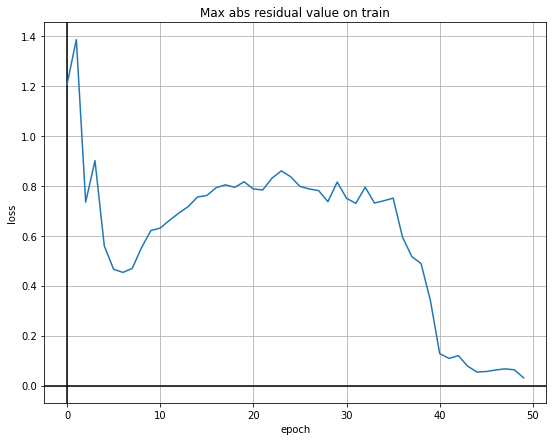

In [19]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [20]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.60849928855896
Valid max absolute error |Appr(x)-y(x)|: 1.5188276767730713
MAPE on train data: 29.885461807250977 %
MAPE on validation data: 30.191438674926758 %
Max residual square loss on train at last epoch: 1.2833038568496704 


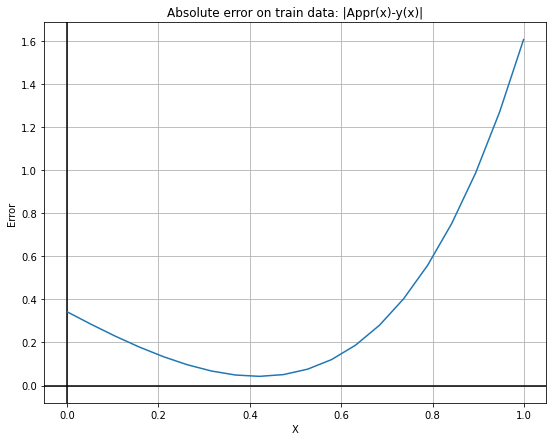

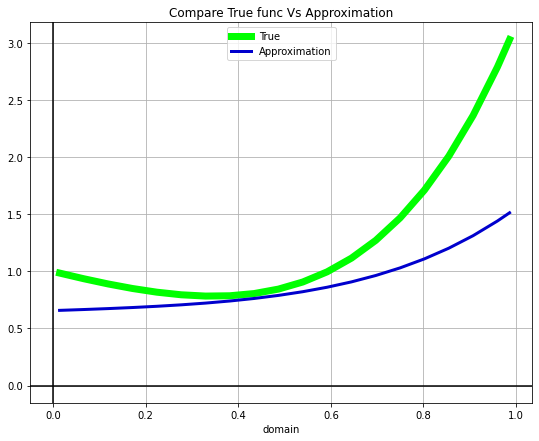

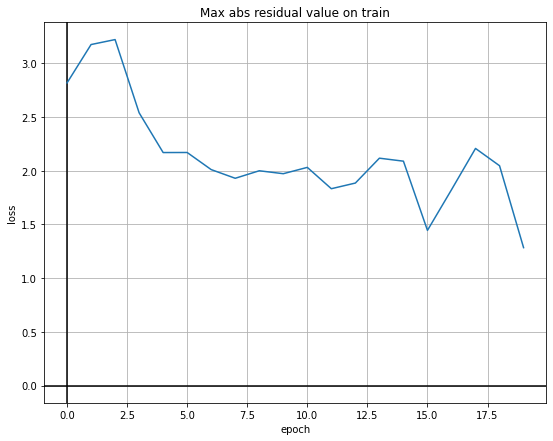

In [21]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [22]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.2576580047607422e-05
Valid max absolute error |Appr(x)-y(x)|: 1.2584030628204346e-05
MAPE on train data: 0.02417730540037155 %
MAPE on validation data: 0.023905213922262192 %
Max residual square loss on train at last epoch: 3.68531196670574e-08 


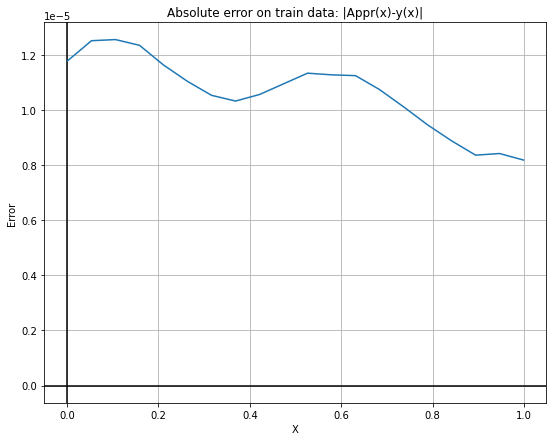

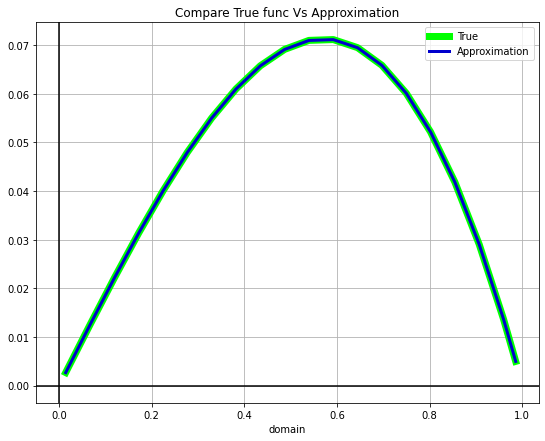

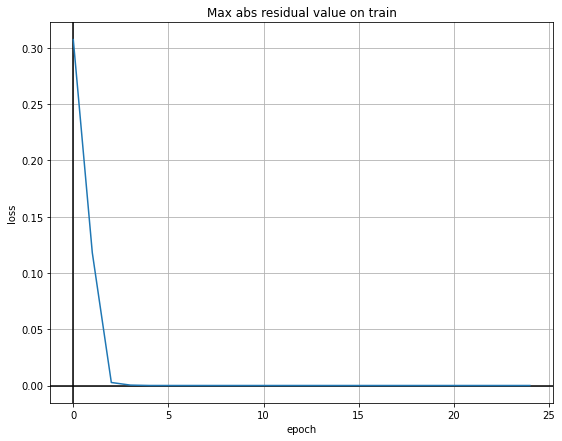

In [23]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [24]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 3.218650817871094e-05
Valid max absolute error |Appr(x)-y(x)|: 3.2067298889160156e-05
MAPE on train data: 0.0014286370715126395 %
MAPE on validation data: 0.0014203601749613881 %
Max residual square loss on train at last epoch: 3.2523894333280623e-07 


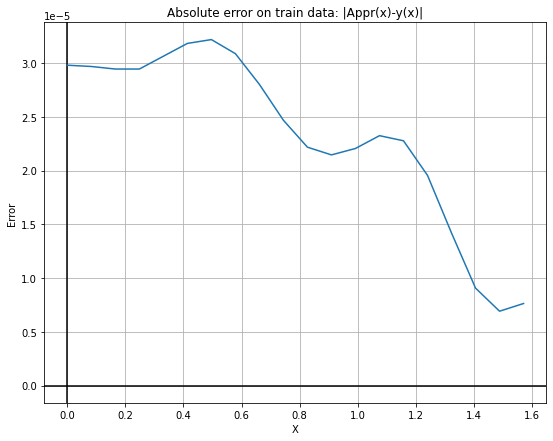

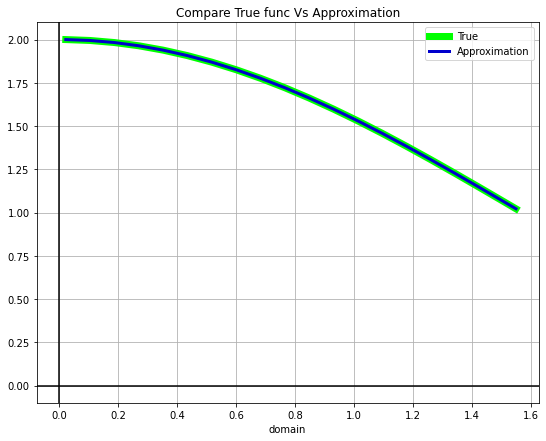

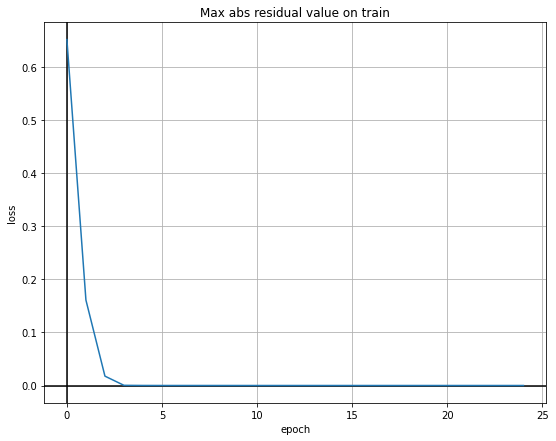

In [25]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [26]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.00011458620429039001
Valid max absolute error |Appr(x)-y(x)|: 0.00011400878429412842
MAPE on train data: 0.004012227524071932 %
MAPE on validation data: 0.003817008575424552 %
Max residual square loss on train at last epoch: 1.0152035429200623e-05 


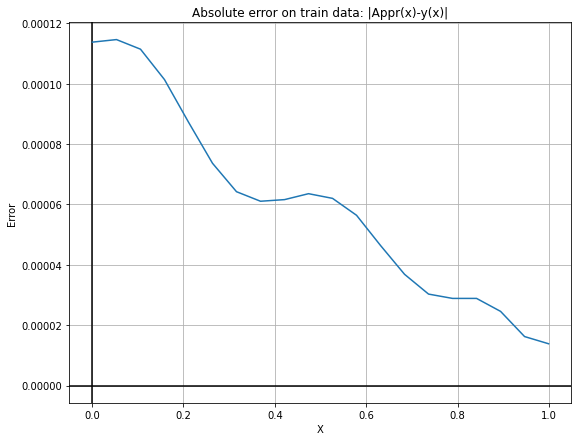

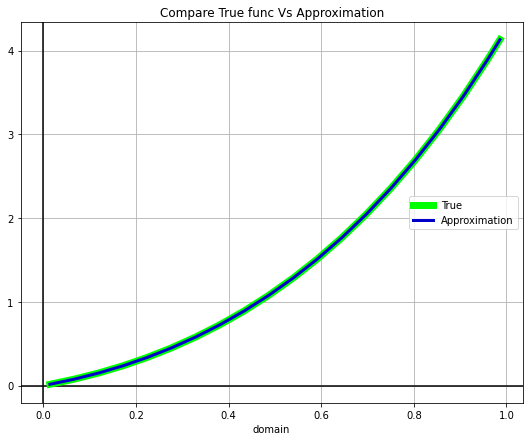

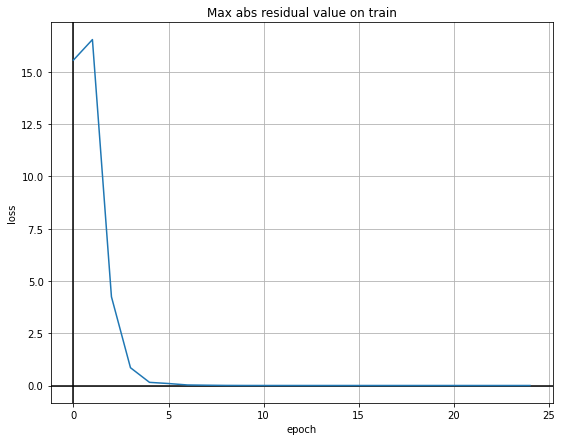

In [27]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [28]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([3.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.03425478935241699
Valid max absolute error |Appr(x)-y(x)|: 0.029641151428222656
MAPE on train data: 0.231234610080719 %
MAPE on validation data: 0.23244738578796387 %
Max residual square loss on train at last epoch: 1.29226827993989e-06 


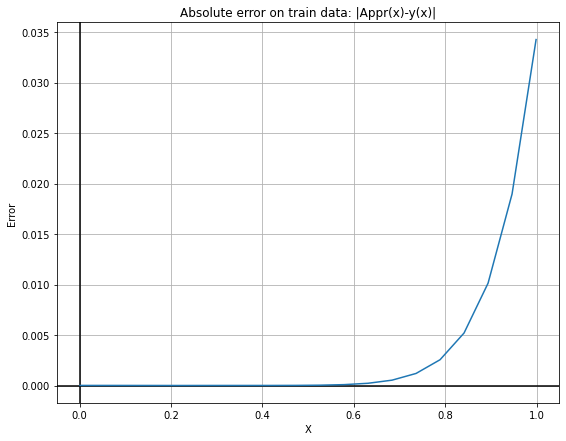

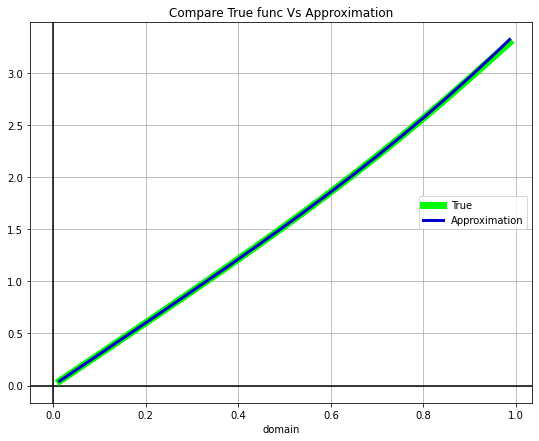

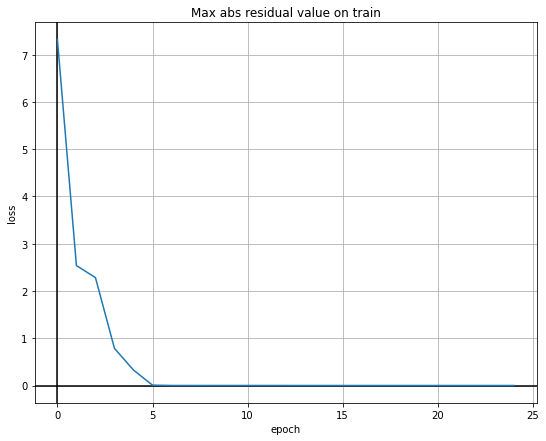

In [29]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [30]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([(1+e)/e],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([(1-e)/e],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 1.0713934898376465e-05
Valid max absolute error |Appr(x)-y(x)|: 1.0609626770019531e-05
MAPE on train data: 0.0006685700500383973 %
MAPE on validation data: 0.0007020589546300471 %
Max residual square loss on train at last epoch: 2.4524800323888485e-07 


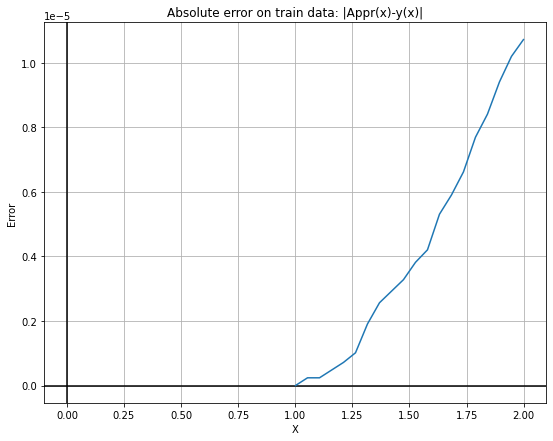

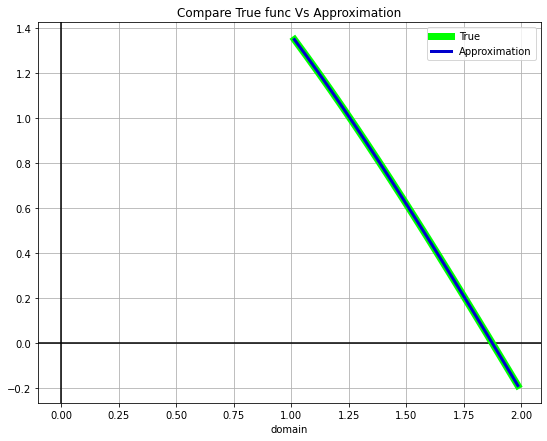

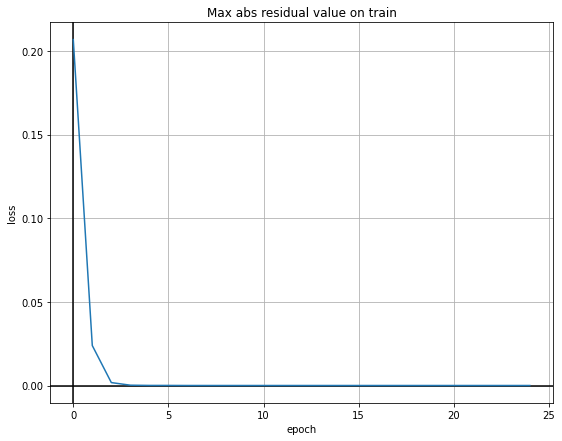

In [31]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [32]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.0013328790664672852
Valid max absolute error |Appr(x)-y(x)|: 0.0013104677200317383
MAPE on train data: 0.07093998044729233 %
MAPE on validation data: 0.07196742296218872 %
Max residual square loss on train at last epoch: 2.6550340407993644e-05 


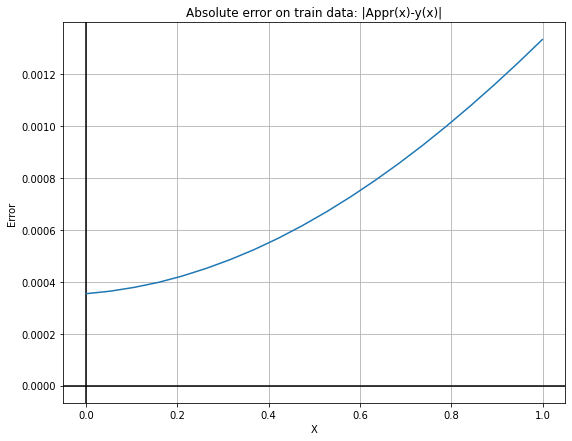

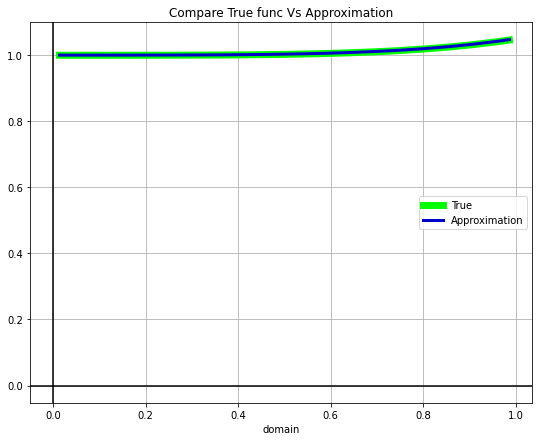

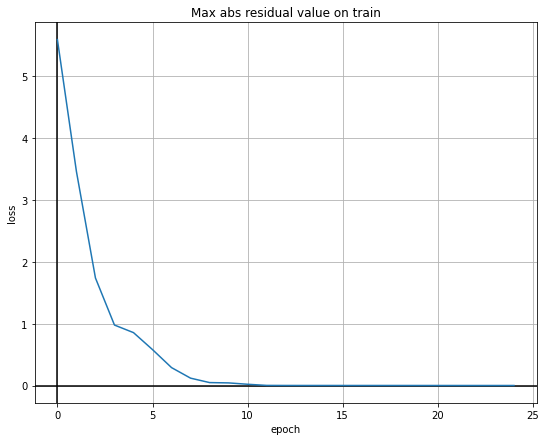

In [33]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [34]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.004453897476196289
Valid max absolute error |Appr(x)-y(x)|: 0.004324436187744141
MAPE on train data: 0.09807386994361877 %
MAPE on validation data: 0.09726864099502563 %
Max residual square loss on train at last epoch: 0.00043829664355143905 


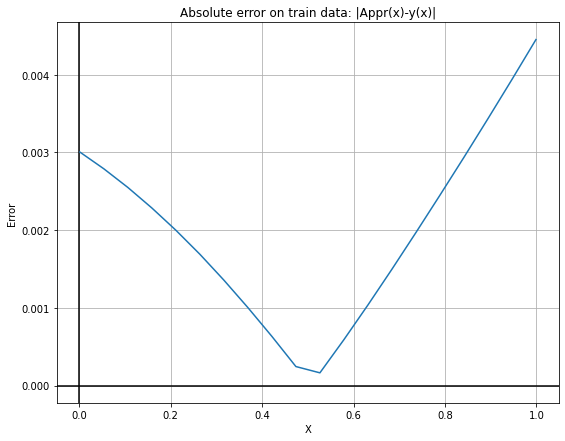

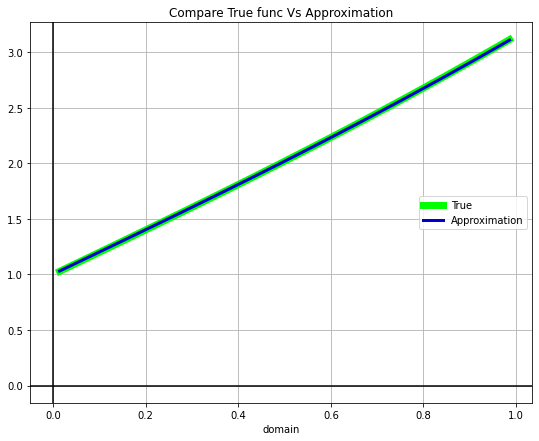

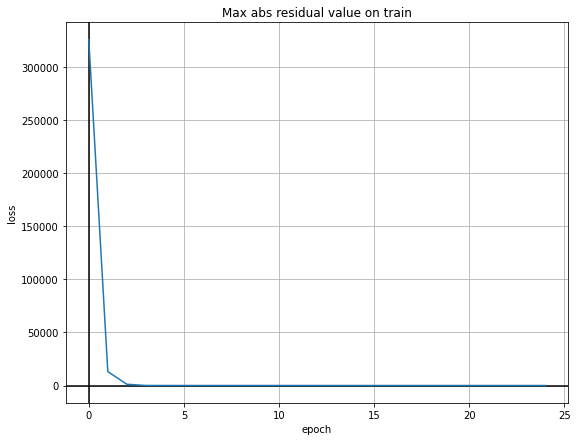

In [35]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [36]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: k*m/(2*l)*(2*l-x)*x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 0.001924276351928711
Valid max absolute error |Appr(x)-y(x)|: 0.0018200874328613281
MAPE on train data: 0.0037101057823747396 %
MAPE on validation data: 0.00366666866466403 %
Max residual square loss on train at last epoch: 5.162866727914661e-06 


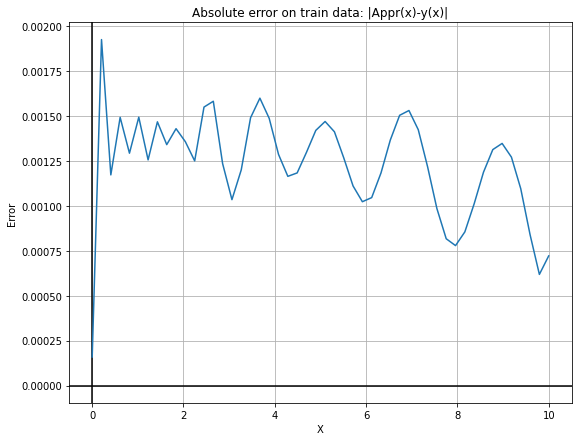

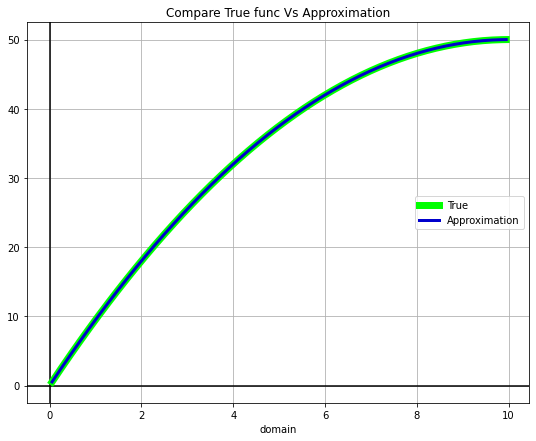

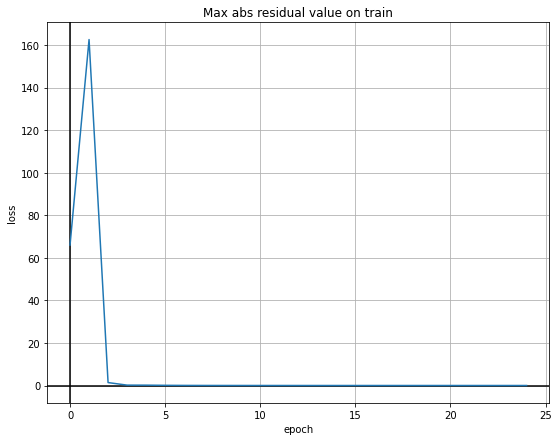

In [37]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [9]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function, variable, 2)
    + 2*variable * nth_derivative(function, variable, 1)
    - 2*function
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x * (1 - x*x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
start_time = time.time()
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.830157995223999 seconds ---


Train max absolute error |Appr(x)-y(x)|: 1.6461359336972237e-05
Valid max absolute error |Appr(x)-y(x)|: 1.5700235962867737e-05
MAPE on train data: 0.005100616719573736 %
MAPE on validation data: 0.005033332388848066 %
Max residual square loss on train at last epoch: 1.6485232663399074e-06 


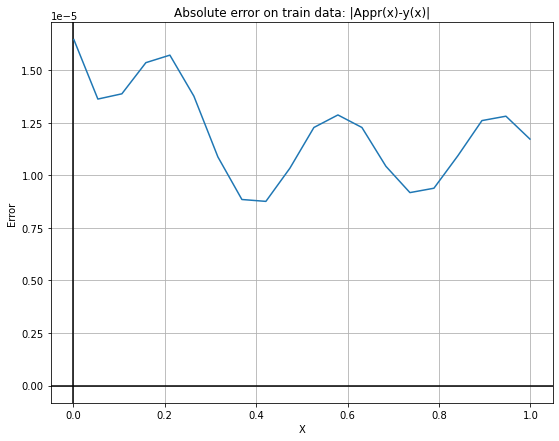

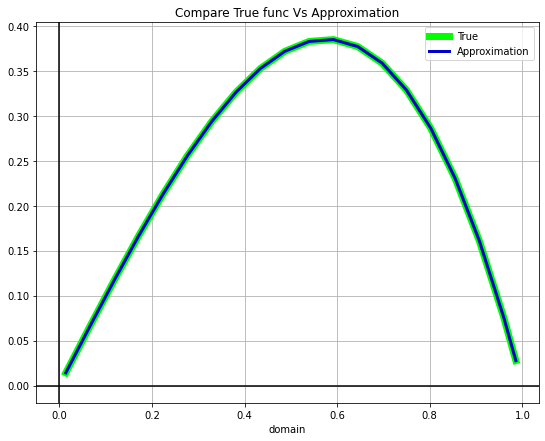

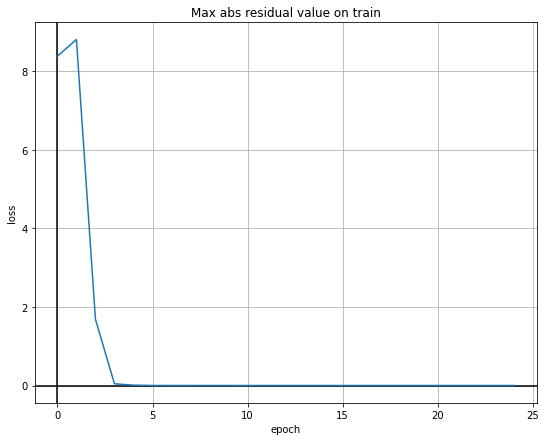

In [10]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [18]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)
print_comparison_table(table_arr, nn_model, true_solution)

       Input  Analytical       ANN     Error
0   0.000000    0.000000  0.000017  0.000017
1   0.014132    0.014129  0.014144  0.000016
2   0.066658    0.066362  0.066375  0.000013
3   0.119184    0.117491  0.117506  0.000014
4   0.171711    0.166648  0.166663  0.000016
5   0.224237    0.212962  0.212977  0.000015
6   0.276763    0.255564  0.255577  0.000013
7   0.329289    0.293584  0.293594  0.000010
8   0.381816    0.326153  0.326162  0.000009
9   0.434342    0.352402  0.352411  0.000009
10  0.486868    0.371461  0.371471  0.000011
11  0.539395    0.382460  0.382472  0.000013
12  0.591921    0.384529  0.384542  0.000013
13  0.644447    0.376800  0.376812  0.000012
14  0.696974    0.358403  0.358413  0.000010
15  0.749500    0.328468  0.328477  0.000009
16  0.802026    0.286126  0.286136  0.000010
17  0.854553    0.230507  0.230518  0.000011
18  0.907079    0.160741  0.160754  0.000013
19  0.959605    0.075960  0.075973  0.000013
20  0.985868    0.027667  0.027679  0.000012
21  1.0000

## № 14

In [11]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 2)
    + nth_derivative(function, variable, 1) * (1 + variable * variable)
    - 5 * variable *function
    - 5 * torch.pow(variable,4)
    - 26 * torch.pow(variable, 3)
    + 4 * torch.pow(variable, 2)
    + 4 * torch.pow(variable, 1)
    + 3
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x - 2 * x * x + x*x*x*x*x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
start_time = time.time()
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.825392246246338 seconds ---


Train max absolute error |Appr(x)-y(x)|: 0.000548998243175447
Valid max absolute error |Appr(x)-y(x)|: 0.0005390467122197151
MAPE on train data: 0.42022666335105896 %
MAPE on validation data: 0.40915897488594055 %
Max residual square loss on train at last epoch: 2.1171410480747e-05 


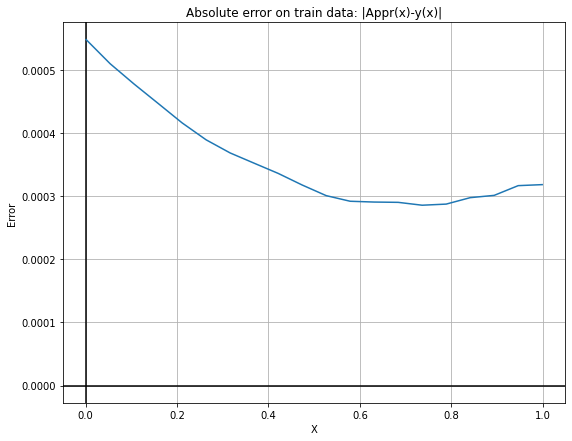

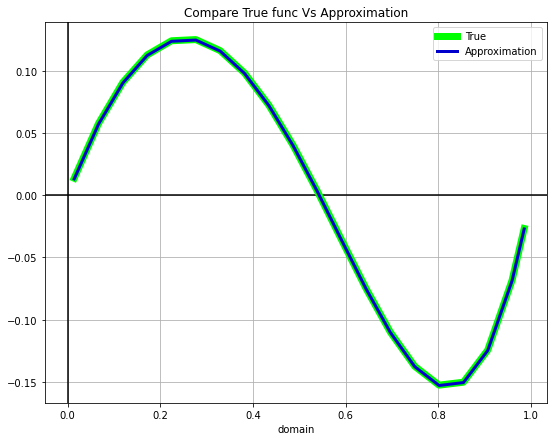

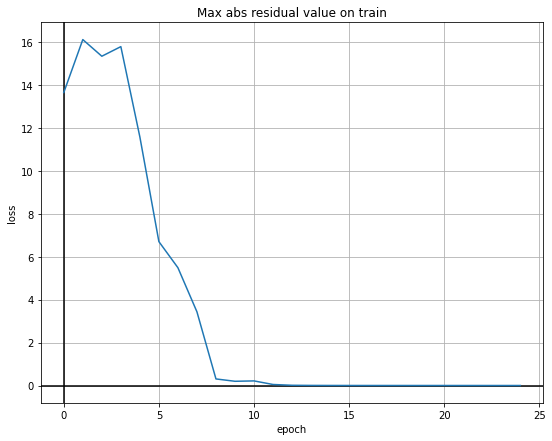

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [21]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)
print_comparison_table(table_arr, nn_model, true_solution)

       Input  Analytical       ANN     Error
0   0.000000    0.000000 -0.000550  0.000550
1   0.014132    0.013732  0.013193  0.000539
2   0.066658    0.057773  0.057270  0.000502
3   0.119184    0.090799  0.090328  0.000471
4   0.171711    0.112891  0.112451  0.000440
5   0.224237    0.124239  0.123830  0.000410
6   0.276763    0.125191  0.124807  0.000384
7   0.329289    0.116298  0.115933  0.000365
8   0.381816    0.098364  0.098015  0.000349
9   0.434342    0.072494  0.072162  0.000332
10  0.486868    0.040143  0.039829  0.000314
11  0.539395    0.003161  0.002863  0.000298
12  0.591921   -0.036156 -0.036448  0.000292
13  0.644447   -0.075020 -0.075312  0.000291
14  0.696974   -0.110103 -0.110393  0.000290
15  0.749500   -0.137486 -0.137771  0.000286
16  0.802026   -0.152615 -0.152905  0.000290
17  0.854553   -0.150252 -0.150551  0.000300
18  0.907079   -0.124425 -0.124728  0.000303
19  0.959605   -0.068381 -0.068705  0.000323
20  0.985868   -0.026694 -0.027019  0.000326
21  1.0000

## № 15

In [15]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function, variable, 2)
    + 2 * variable * nth_derivative(function, variable, 1)
    + variable * function
    - torch.exp(variable) * (torch.tensor([1.0], requires_grad=True) + 3 * variable * variable)
    + variable 
    + variable * variable
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: (1-x)*(1-torch.exp(x))
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
start_time = time.time()
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.3849101066589355 seconds ---


Train max absolute error |Appr(x)-y(x)|: 3.266532439738512e-05
Valid max absolute error |Appr(x)-y(x)|: 3.232434391975403e-05
MAPE on train data: 0.00873596966266632 %
MAPE on validation data: 0.008794069290161133 %
Max residual square loss on train at last epoch: 2.9303748760867165e-07 


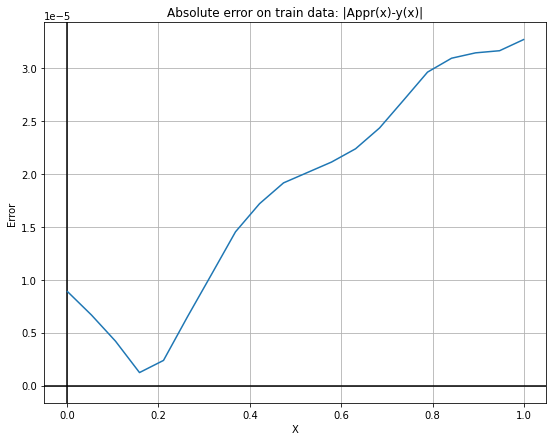

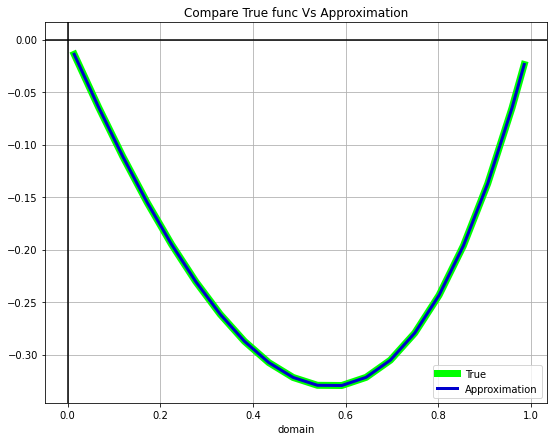

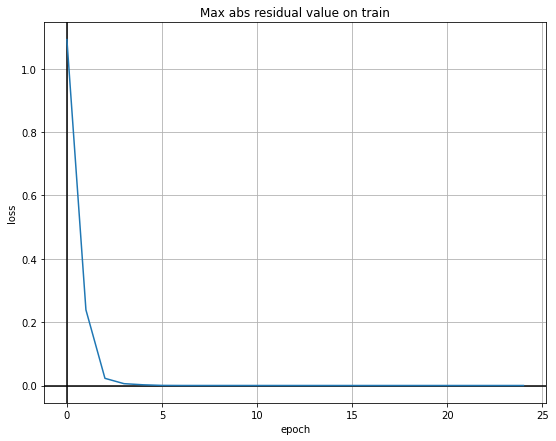

In [16]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [17]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)
print_comparison_table(table_arr, nn_model, true_solution)

       Input  Analytical       ANN         Error
0   0.000000    0.000000 -0.000009  9.119511e-06
1   0.014132   -0.014031 -0.014039  8.299015e-06
2   0.066658   -0.064335 -0.064341  6.102026e-06
3   0.119184   -0.111491 -0.111495  3.784895e-06
4   0.171711   -0.155167 -0.155167  3.874302e-07
5   0.224237   -0.195002 -0.194998  3.188848e-06
6   0.276763   -0.230607 -0.230599  7.644296e-06
7   0.329289   -0.261564 -0.261552  1.174212e-05
8   0.381816   -0.287420 -0.287405  1.516938e-05
9   0.434342   -0.307688 -0.307670  1.776218e-05
10  0.486868   -0.321843 -0.321823  1.943111e-05
11  0.539395   -0.329318 -0.329298  2.050400e-05
12  0.591921   -0.329506 -0.329485  2.154708e-05
13  0.644447   -0.321752 -0.321729  2.270937e-05
14  0.696974   -0.305350 -0.305325  2.506375e-05
15  0.749500   -0.279543 -0.279516  2.756715e-05
16  0.802026   -0.243519 -0.243489  2.984703e-05
17  0.854553   -0.196401 -0.196370  3.130734e-05
18  0.907079   -0.137252 -0.137220  3.150105e-05
19  0.959605   -0.06

## № 16

In [18]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function, variable, 2)
    - function
    - 2 * torch.cos(variable-1) 
    + 2 * variable * torch.sin(variable - 1)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x * torch.sin(x-1)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
start_time = time.time()
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.3128702640533447 seconds ---


Train max absolute error |Appr(x)-y(x)|: 2.9522343538701534e-06
Valid max absolute error |Appr(x)-y(x)|: 2.9783695936203003e-06
MAPE on train data: 0.000956767937168479 %
MAPE on validation data: 0.0009450031211599708 %
Max residual square loss on train at last epoch: 6.835832344620485e-09 


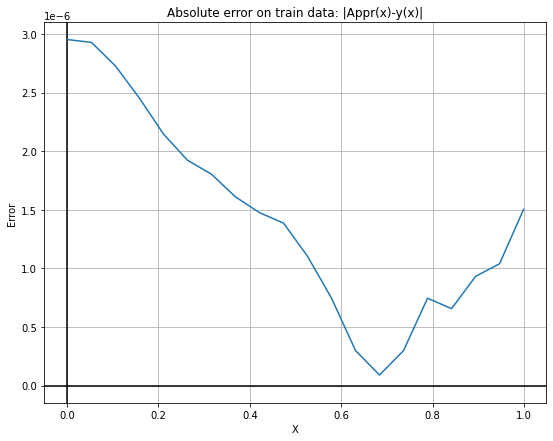

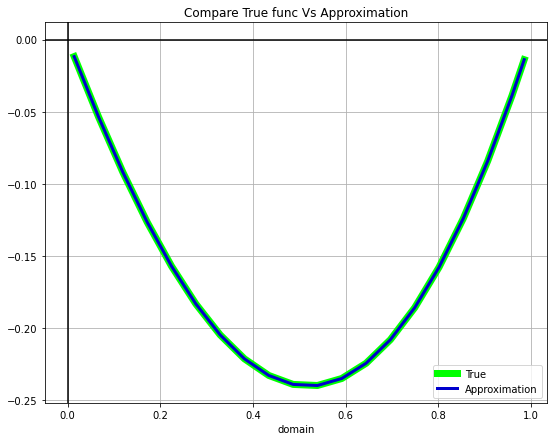

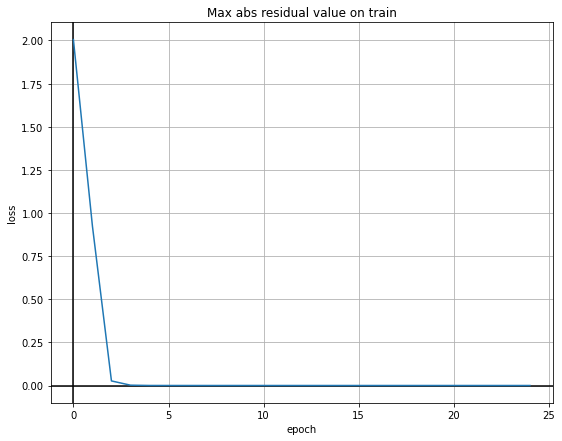

In [19]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [20]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)
print_comparison_table(table_arr, nn_model, true_solution)

       Input  Analytical       ANN         Error
0   0.000000   -0.000000 -0.000003  3.010035e-06
1   0.014132   -0.011782 -0.011785  2.978370e-06
2   0.066658   -0.053567 -0.053570  2.849847e-06
3   0.119184   -0.091922 -0.091925  2.689660e-06
4   0.171711   -0.126512 -0.126514  2.250075e-06
5   0.224237   -0.157024 -0.157026  2.145767e-06
6   0.276763   -0.183166 -0.183168  1.952052e-06
7   0.329289   -0.204667 -0.204669  1.743436e-06
8   0.381816   -0.221284 -0.221285  1.579523e-06
9   0.434342   -0.232795 -0.232796  1.564622e-06
10  0.486868   -0.239008 -0.239009  1.400709e-06
11  0.539395   -0.239756 -0.239757  9.983778e-07
12  0.591921   -0.234902 -0.234903  7.301569e-07
13  0.644447   -0.224338 -0.224338  2.831221e-07
14  0.696974   -0.207984 -0.207984  1.192093e-07
15  0.749500   -0.185792 -0.185792  5.662441e-07
16  0.802026   -0.157745 -0.157744  8.195639e-07
17  0.854553   -0.123855 -0.123854  7.525086e-07
18  0.907079   -0.084166 -0.084165  7.972121e-07
19  0.959605   -0.03

## № 17

In [21]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function, variable, 2)
    + nth_derivative(function, variable, 1) * (torch.tensor([1.0], requires_grad = True) + 
                                               2 * variable*variable)
    + function * (1 + variable)
    + torch.tensor([1.0], requires_grad = True)
    + variable
    - 2 * variable * variable
    + 5 * variable * variable * variable
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound - dh, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x  - x*x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
start_time = time.time()
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.191009759902954 seconds ---


Train max absolute error |Appr(x)-y(x)|: 3.737211227416992e-05
Valid max absolute error |Appr(x)-y(x)|: 3.7550926208496094e-05
MAPE on train data: 0.014028915204107761 %
MAPE on validation data: 0.01408965140581131 %
Max residual square loss on train at last epoch: 3.823656058443703e-08 


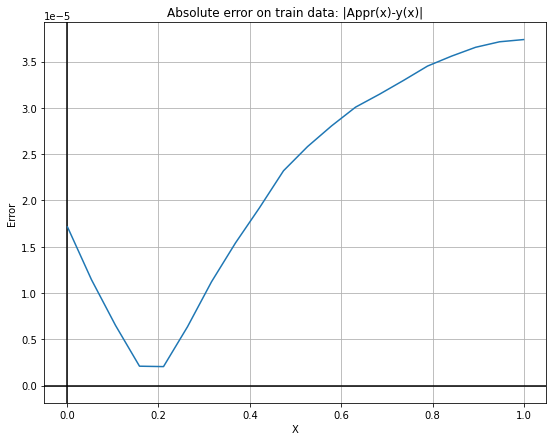

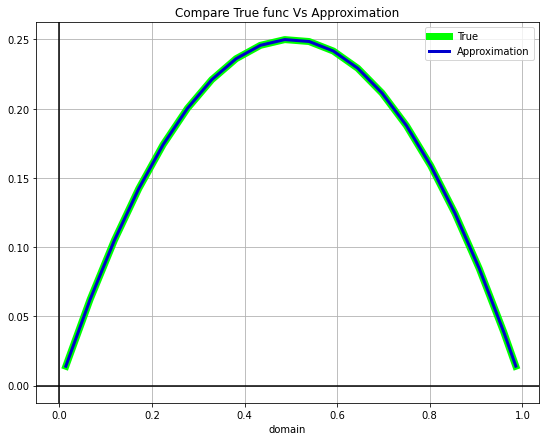

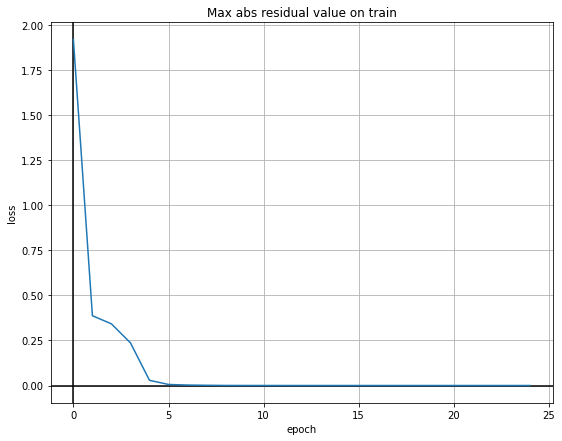

In [22]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [23]:
table_arr = main_domain.get_valid_domain()
table_arr = torch.cat([torch.Tensor([[left_bound]]), table_arr, torch.Tensor([[right_bound]])], dim = 0)
print_comparison_table(table_arr, nn_model, true_solution)

       Input  Analytical       ANN     Error
0   0.000000    0.000000 -0.000017  0.000017
1   0.014132    0.013932  0.013916  0.000016
2   0.066658    0.062215  0.062205  0.000010
3   0.119184    0.104979  0.104974  0.000005
4   0.171711    0.142226  0.142225  0.000001
5   0.224237    0.173955  0.173958  0.000003
6   0.276763    0.200165  0.200173  0.000008
7   0.329289    0.220858  0.220870  0.000012
8   0.381816    0.236032  0.236049  0.000017
9   0.434342    0.245689  0.245709  0.000020
10  0.486868    0.249828  0.249851  0.000024
11  0.539395    0.248448  0.248475  0.000026
12  0.591921    0.241551  0.241579  0.000029
13  0.644447    0.229135  0.229166  0.000031
14  0.696974    0.211201  0.211233  0.000032
15  0.749500    0.187750  0.187783  0.000033
16  0.802026    0.158780  0.158815  0.000035
17  0.854553    0.124292  0.124328  0.000036
18  0.907079    0.084287  0.084323  0.000037
19  0.959605    0.038763  0.038800  0.000037
20  0.985868    0.013932  0.013969  0.000037
21  1.0000